<a href="https://colab.research.google.com/github/YG-0/Datascience_assisgnments/blob/main/50_Startups_Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_csv("/content/50_Startups.csv")

In [56]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [57]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [58]:
df.State.nunique()

3

In [59]:
df = pd.get_dummies(df, columns=['State'],drop_first=True)

In [62]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [64]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [65]:
X = df.drop('Profit',axis=1)

In [67]:
y = df['Profit']

In [68]:
X.shape

(50, 5)

In [69]:
y.shape

(50,)

In [70]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

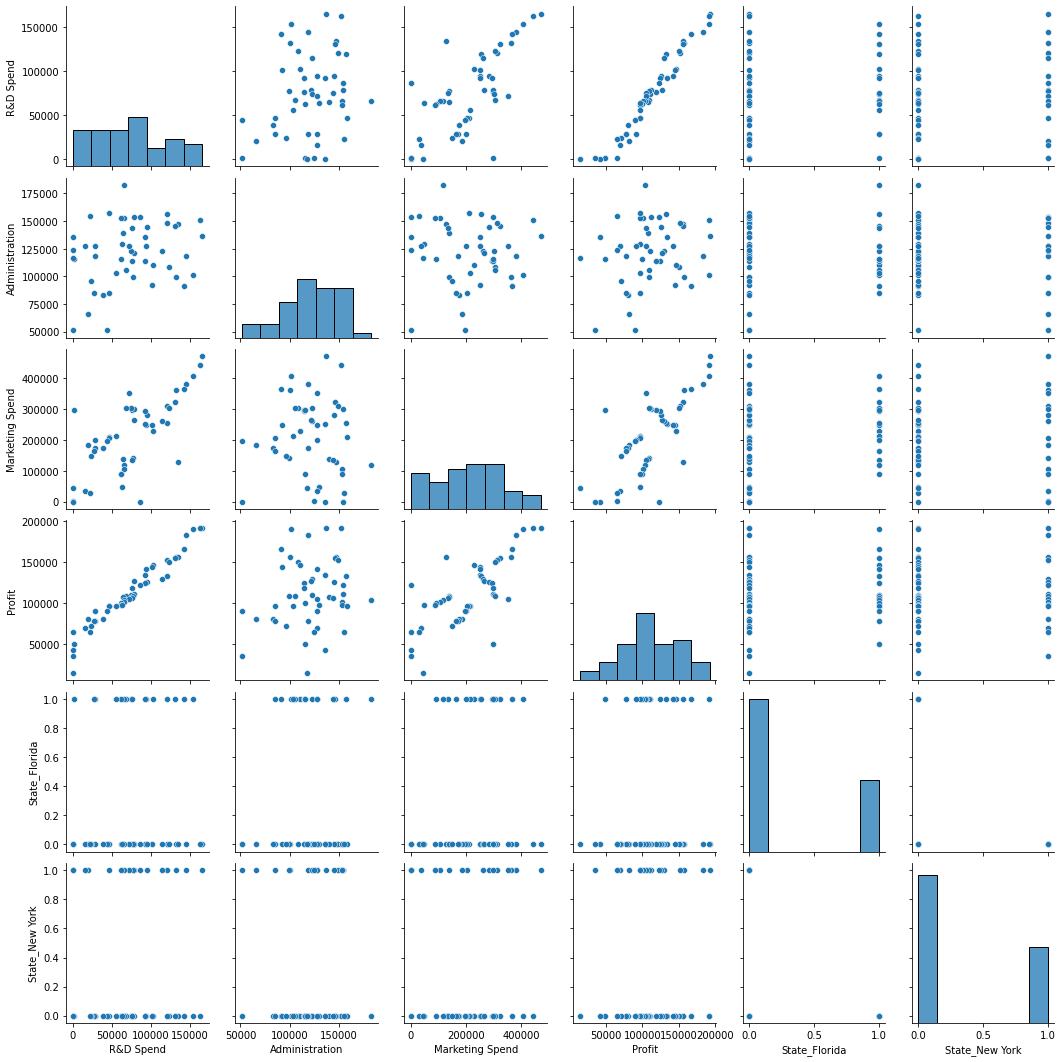

In [71]:
sns.pairplot(df)

In [72]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
State_Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
X_scaled = scaler.fit_transform(X)

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [76]:
import statsmodels.api as sm
X1 = sm.add_constant(X_scaled)
result = sm.OLS(y, X1).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [77]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.34e-27
Time:                        14:23:25   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   1334.905     83.911      0.000    1.09e+05    1.15e+05
x1          3.663e+04   2108.775     17.369      0.000    3.24e+04    4.09e+04
x2          -748.9975   1448.705     -0.517      0.608   -3668.671    2170.676
x3          3266.2152   2075.251      1.574      0.123    -916.178    7448.608
x4            92.7302   1572.494      0.059      0.953   -3076.424    3261.885
x5           -19.8422   1542.414     -0.013      0.990   -3128.374    3088.690
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                         2.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
lr.fit(X_scaled,y)
print(f"intercept: {lr.intercept_}")
print(f"coefficient: {lr.coef_}")
print(f"score: {np.round(lr.score(X_scaled,y),3)}")

intercept: 112012.63920000002
coefficient: [ 3.66264283e+04 -7.48997469e+02  3.26621519e+03  9.27302311e+01
 -1.98422484e+01]
score: 0.951


In [79]:
from sklearn.linear_model import Lasso

In [80]:
lasso = Lasso()

In [81]:
lasso.fit(X_scaled,y)
print(f"intercept: {lasso.intercept_}")
print(f"coefficient: {lasso.coef_}")
print(f"score: {np.round(lasso.score(X_scaled,y),3)}")

intercept: 112012.63920000002
coefficient: [ 3.66268100e+04 -7.48152742e+02  3.26509420e+03  9.22107838e+01
 -1.91550103e+01]
score: 0.951


In [82]:
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}